# Lab | Revisiting Machine Learning Case Study

### Instructions

Complete the following steps on the categorical columns in the dataset:

- Check for null values in all the columns
- Exclude the following variables by looking at the definitions. Create a new empty list called `drop_list`. We will append this list and then drop all the columns in this list later:
    - `OSOURCE` - symbol definitions not provided, too many categories
    - `ZIP CODE` - we are including state already
- Identify columns that over 85% missing values
- Remove those columns from the dataframe
- Reduce the number of categories in the column `GENDER`. The column should only have either "M" for males, "F" for females, and "other" for all the rest
    - Note that there are a few null values in the column. We will first replace those null values using the code below:
    

    ```python
    print(categorical['GENDER'].value_counts())
    categorical['GENDER'] = categorical['GENDER'].fillna('F')
    ```


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('learningSet.csv')

/var/folders/dj/n16zrnc50j79vq_pt7btwyg40000gn/T/ipykernel_23598/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [4]:
categorical = data.select_dtypes('object')

In [5]:
is_na = categorical.isna().sum().reset_index()

In [6]:
is_na.columns = ['columns', 'sum_na']

In [7]:
is_na['sum_na'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74 entries, 0 to 73
Series name: sum_na
Non-Null Count  Dtype
--------------  -----
74 non-null     int64
dtypes: int64(1)
memory usage: 720.0 bytes


In [8]:
is_na[is_na['sum_na']>0]

,columns,sum_na
73,GEOCODE2,132


In [9]:
# CREATING LIST OF COLUMNS TO DROP

drop_list = []

# INCLUDE OSOURCE AND ZIP CODE
drop_list.extend(['OSOURCE', 'ZIP'])

In [10]:
# IDENTIFY COLUMNS WITH MORE THAN 85% MISSING VALUES

df = data.isna().sum().reset_index()
df.columns = ['columns', 'na']
df['na'] = df['na'].apply(lambda x: x/len(data))

In [11]:
#APPEND TO DROP LIST: 

drop_list.extend(df[df['na']>0.85]['columns'].values.tolist())

In [12]:
# REMOVE THOSE COLUMNS FROM THE DATAFRAME

data.drop(drop_list, axis = 1, inplace=True)

In [13]:
# REDUCE THE CATEGORIES IN COLUMN GENDER

data['GENDER'].isna().sum()

0

In [14]:
data['GENDER'].value_counts() # the empty values will be replaced with the mode

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [15]:
data['GENDER'] = data['GENDER'].replace(' ', 'F')


In [16]:
data['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [17]:
# REPLACE EVERYTHING ELSE WITH OTHERS

data.loc[(data.GENDER == 'U') | (data.GENDER == 'J') | (data.GENDER == 'C') | (data.GENDER == 'A'), 'GENDER'] = 'OTHERS'

# Lab | Feature engineering

### Instructions

Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

- Check for null values in the numerical columns.
- Use appropriate methods to clean the columns `GEOCODE2`, `WEALTH1`, `ADI`, `DMA`,and `MSA`.
- Use appropriate EDA technique where ever necessary.

In [18]:
# CHECKING FOR NULL VALUES IN THE NUMERICAL DATA

numerical = data.select_dtypes(np.number)

In [19]:
df = pd.DataFrame(numerical.isna().sum(), columns = ['isna']).reset_index()
nan_columns = df[df['isna'] > 0]['index'].tolist()

In [20]:
# CLEAN COLUMN GEOCODE2

data.GEOCODE2.value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [21]:
data['GEOCODE2'] = data.GEOCODE2.fillna('A') # fill in with the mode
data['GEOCODE2'] = data.GEOCODE2.replace(' ', 'A') # replace empty string with the mode
data.GEOCODE2.value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [57]:
# CLEAN COLUMN WEALTH1 = Wealth Rating

df = pd.DataFrame(data.WEALTH1.value_counts(dropna=False)).reset_index()
df.columns = ('rating', 'count')
print(data.WEALTH1.describe())
df.head()

count    95093.000000
mean         5.346324
std          2.742507
min          0.000000
25%          3.000000
50%          6.000000
75%          8.000000
max          9.000000
Name: WEALTH1, dtype: float64


,rating,count
0,9.0,14246
1,8.0,12739
2,7.0,11631
3,6.0,10927
4,5.0,9905


In [58]:
# My idea here is to replace the NaN Values according to the ratio of ratings: 

#get number of Null Values
na_count = df['count'][0]  

#Create DF to split the NaN Values: 
df_notna = df[df['rating'].notna()] #drop the Nan

#Compute ratio of ratings (not considering the NaN)
df_notna['percentage'] = df_notna['count'].apply(lambda x: x/(len(data['WEALTH1'])-df['count'][0]))
df_notna.head()

,rating,count,percentage
0,9.0,14246,0.176209
1,8.0,12739,0.157569
2,7.0,11631,0.143864
3,6.0,10927,0.135157
4,5.0,9905,0.122515


In [59]:
#Compute the amount of NaNs for each rating:
import math

# add column to dataframe where the amount of NaN Values are mulitpied by the rating ratio
df_notna['split'] = [(na_count*rows['percentage']) for idx, rows in df_notna.iterrows()]   

# rounding with floor
df_notna.split = df_notna.split.apply(lambda x: math.floor(x)) 
df_notna.head()

,rating,count,percentage,split
0,9.0,14246,0.176209,2510
1,8.0,12739,0.157569,2244
2,7.0,11631,0.143864,2049
3,6.0,10927,0.135157,1925
4,5.0,9905,0.122515,1745


In [60]:
#filter the df where Wealth1 is NaN
df_ = data.loc[data.WEALTH1.isna()]
print(sum(df_notna.split))

16751


In [33]:
# 1)for each rating pick a random sample(n=split) from the df_ 
# 2)drop those rows from df_ based on the index
# 3)replace the WEALTH1 with the corresponding rating 
# 4)collect the dfs with the new values in a list


replace_list = [] #4

for idx in df_notna.index:
    df = df_.sample(df_notna.split[idx]) #1
    df['WEALTH1'] = df_notna.rating[idx] 
    replace_list.append(df)
    df_ = df_.drop(index = df.index.values)
    print('The lenght of df{} is {}. The lenght of df_ is {}'.format(idx, len(df), len(df_)))    
    

The lenght of df1 is 6694. The lenght of df_ is 38038
The lenght of df2 is 5995. The lenght of df_ is 32043
The lenght of df3 is 5470. The lenght of df_ is 26573
The lenght of df4 is 5141. The lenght of df_ is 21432
The lenght of df5 is 4660. The lenght of df_ is 16772
The lenght of df6 is 4245. The lenght of df_ is 12527
The lenght of df7 is 3739. The lenght of df_ is 8788
The lenght of df8 is 3605. The lenght of df_ is 5183
The lenght of df9 is 3048. The lenght of df_ is 2135
The lenght of df10 is 2129. The lenght of df_ is 6


In [35]:
# Now replace the NaN Values it the original df (data) with the 'WEALTH1' rating based on the index

for i, elem in enumerate(replace_list):
    data.loc[replace_list[i].index.values, 'WEALTH1'] = elem['WEALTH1'] 
    print('for index {} were {} values replaced'.format(i, len(df['WEALTH1'])))

for index 0 were 2129 values replaced
for index 1 were 2129 values replaced
for index 2 were 2129 values replaced
for index 3 were 2129 values replaced
for index 4 were 2129 values replaced
for index 5 were 2129 values replaced
for index 6 were 2129 values replaced
for index 7 were 2129 values replaced
for index 8 were 2129 values replaced
for index 9 were 2129 values replaced


In [36]:
data.WEALTH1.value_counts(dropna = False) # There are only 6 NaNs left - this is due to the math.floor() methode

9.0    14279
8.0    12788
7.0    11668
6.0    10966
5.0     9940
4.0     9055
3.0     7976
2.0     7690
1.0     6502
0.0     4542
NaN        6
Name: WEALTH1, dtype: int64

In [37]:
data['WEALTH1']= data['WEALTH1'].fillna(9.0) # filling the missing NaNs with the mode

In [39]:
# CLEAN COLUMNS ADI

print(data.ADI.isna().sum())
data.ADI.describe()

132


count    95280.000000
mean       187.356402
std        137.019184
min          0.000000
25%         65.000000
50%        175.000000
75%        279.000000
max        651.000000
Name: ADI, dtype: float64

<AxesSubplot:xlabel='ADI', ylabel='Count'>

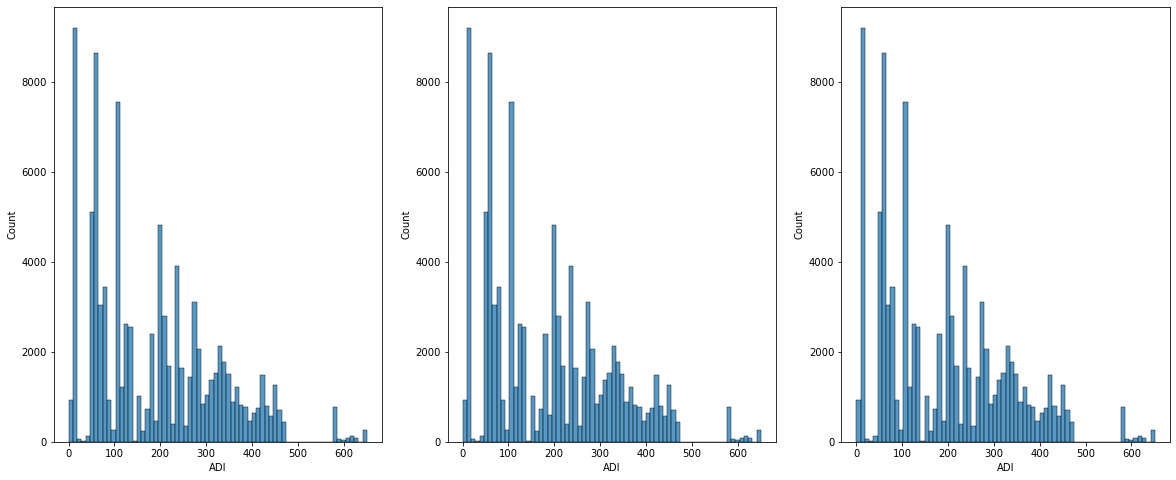

In [40]:
#checking which method to replace the nan with makes the most sense: However i do not expect a difference since the amount of NaNs is small

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize = (20,8))

sns.histplot(data.ADI, ax = ax[0])
sns.histplot(data.ADI.fillna(np.mean(data.ADI)), ax = ax[1])
sns.histplot(data.ADI.fillna(np.median(data.ADI)), ax = ax[2])

#It makes not difference since the missing value are only around 130

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADI'>

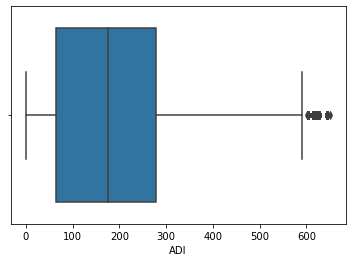

In [41]:
sns.boxplot(data.ADI)

# I do not consider the points outside of the upper wick as outliers

In [42]:
data['ADI'].fillna((np.median(data.ADI)), inplace = True) # Replacing the NaN with the Median

132
<class 'pandas.core.series.Series'>
RangeIndex: 95412 entries, 0 to 95411
Series name: DMA
Non-Null Count  Dtype  
--------------  -----  
95280 non-null  float64
dtypes: float64(1)
memory usage: 745.5 KB
None
count    95280.000000
mean       664.004072
std        116.363600
min          0.000000
25%        561.000000
50%        635.000000
75%        801.000000
max        881.000000
Name: DMA, dtype: float64


<AxesSubplot:xlabel='DMA', ylabel='Count'>

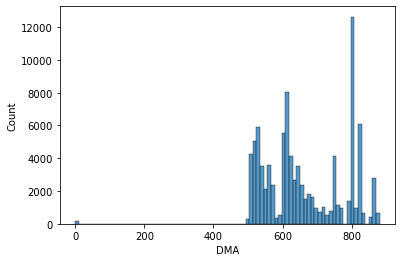

In [43]:
# CLEANING DMA

print(data.DMA.isna().sum())
print(data.DMA.info())
print(data.DMA.describe())

sns.histplot(data.DMA)

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMA'>

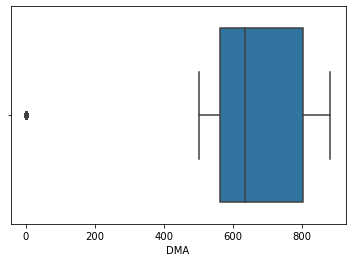

In [44]:
sns.boxplot(data.DMA)

In [45]:
# Removing the outlier: 

data = data.loc[data['DMA'] > 400]

<AxesSubplot:xlabel='DMA', ylabel='Count'>

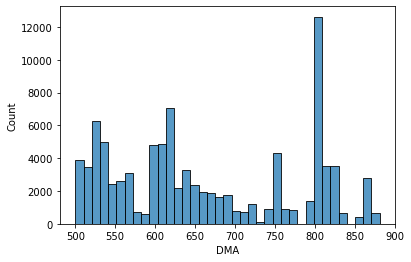

In [46]:
sns.histplot(data.DMA)

In [48]:
# Replacing Null Values:

data.DMA.fillna((np.mean(data.DMA)), inplace = True)

In [53]:
# CLEANING MSA

print(data.MSA.isna().sum())
print(data.MSA.describe())

0
count    95093.000000
mean      3534.681396
std       2862.439210
min          0.000000
25%        520.000000
50%       3360.000000
75%       5960.000000
max       9360.000000
Name: MSA, dtype: float64


<AxesSubplot:xlabel='MSA', ylabel='Count'>

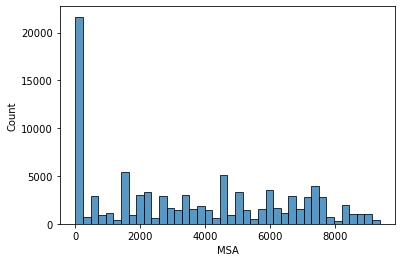

In [54]:
sns.histplot(data.MSA)

/Users/steib/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSA'>

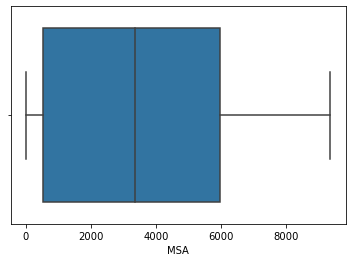

In [55]:
sns.boxplot(data.MSA)

#No Null Values and no Outliers. There is no reason for cleaning for now!